# Introduction
___
We are living in the age of a global pandemic. Covid-19 has a put a dent in the global economy that hasn't been seen in decades. One of the many industries that are suffering because of the pandemic is global sports. Professional sports leagues aorund the had to shut down for months. Once these leagues such as the English premier league and NBA started to return, they couldn't allow fans back into the stadiums. This has led to teams losing a chunk of their yearly revenue. Major League Baseball is a prime example of how much revenue is being lossed due to the absence of ticket sales.  

The purpose of this project is to predict home attendances for the New York mets. If we can succesfully predict attendance for New York Mets home games then not only can we better estimate the lost revenue this season but we can also determine how to increase revenue in following seasons when fans are back allowed in stadiums again. 

We will eventually use regeression and time series models to predict our target variable. Our data was collected from the Baseball Reference website. We looked at the past 10 seasons of results data for the Mets.

### Column Descriptions:

* **game#** = The game number of that season for the Mets.
* **date** = The month, day and date the game was played.
* **h/a** = '@' indicating that the game was played at the opponents home ground.
* **w-l** = win-loss record for that season for the Mets at the time of the game.
* **rank** = Divisional rank for the mets at the time of the game.
* **games_behind** = the average of the differences between the leading team wins and the trailing team wins, and the leading teams losses and the trailing team losses.
* **d/n** = 'D' indicating a day game. 'N' indicating a night game
* **attendance** = Ticket sales for that game.
* **cli** = How important a game for he probability of winning the championship.
* **streak** = '+' indicating a winning streak. '-' indicating a losing streak.

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

## Data Exploration & Cleaning
___
In order to the models to our data we need to clean the data set first. Therefore, we have to remove or impute any missing values, convert string columns to numeric columns etc.

In [2]:
nym = pd.read_csv('nym_mlb.txt', sep = ',')  # read in the text file

In [3]:
print(nym.shape)  # check the dimensions of the 
nym.head()  # print the first 5 rows

(1620, 11)


,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


* the `h/a` column indicates whether the game was played citifield, which is the Mets homeground, or at away ground.
* '@' value indicates that it was played at the opponents home turf.

In [4]:
nym['h/a'].value_counts(dropna=False)  # the games should be equally distributed in both classes

@      810
NaN    810
Name: h/a, dtype: int64

In [5]:
# We only want the games that were played at the NY Mets home stadium
nym_home = nym[nym['h/a'] != '@'].copy()
nym_home.shape

(810, 11)

**We need to add year values to the date column in order to signifity which season the game belongs to.**

* The following indices _81, 162, 243, 324, 405, 486, 567, 648, 729_ indicate the start of a new season, since there are 81 home games per season

In [6]:
import warnings  
from pandas.core.common import SettingWithCopyWarning  # in order to avoid setting with copy warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [7]:
# add the 'year' string depending on the index values
nym_home['date'][:81] = nym_home['date'][:81] + ' 2010'
nym_home['date'][81:162] = nym_home['date'][81:162] + ' 2011'
nym_home['date'][162:243] = nym_home['date'][162:243] + ' 2012'
nym_home['date'][243:324] = nym_home['date'][243:324] + ' 2013'
nym_home['date'][324:405] = nym_home['date'][324:405] + ' 2014'
nym_home['date'][405:486] = nym_home['date'][405:486] + ' 2015'
nym_home['date'][486:567] = nym_home['date'][486:567] + ' 2016'
nym_home['date'][567:648] = nym_home['date'][567:648] + ' 2017'
nym_home['date'][648:729] = nym_home['date'][648:729] + ' 2018'
nym_home['date'][729:] = nym_home['date'][729:] + ' 2019'

In [8]:
nym_home.head()  # check the modified data

,game#,date,h/a,opponent,w-l,rank,games_behind,d/n,attendance,cli,streak
0,1,Monday Apr 5 2010,NaN,FLA,1-0,1,Tied,D,41245.00,1.08,+
1,2,Wednesday Apr 7 2010,NaN,FLA,1-1,3,1.0,N,38863.00,1.14,-
2,3,Thursday Apr 8 2010,NaN,FLA,1-2,4,1.0,N,25982.00,1.01,--
3,4,Friday Apr 9 2010,NaN,WSN,2-2,2,1.0,N,28055.00,0.98,+
4,5,Saturday Apr 10 2010,NaN,WSN,2-3,4,2.0,D,33044.00,1.06,-


In [9]:
nym_home.info()  # check the column types and how many null values they have

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 1619
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game#         810 non-null    int64  
 1   date          810 non-null    object 
 2   h/a           0 non-null      object 
 3   opponent      810 non-null    object 
 4   w-l           810 non-null    object 
 5   rank          810 non-null    int64  
 6   games_behind  810 non-null    object 
 7   d/n           810 non-null    object 
 8   attendance    797 non-null    float64
 9   cli           810 non-null    float64
 10  streak        810 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 75.9+ KB


* As expected, `h/a` column should have no more non-null values.
* Attendance is missing for 13 games. Let's inspect these observations.

In [10]:
# drop h/a since all games are home games now. Drop w-l because it's not giving very different 
# information from games_behind

nym_home.drop(columns= ['h/a','w-l'], inplace= True)  

In [11]:
nym_home[nym_home['attendance'].isnull() == True]  # print the rows with null attendance

,game#,date,opponent,rank,games_behind,d/n,attendance,cli,streak
19,20,Tuesday Apr 27 (1) 2010,LAD,1,up 0.5,D,nan,1.02,+++++
156,157,Wednesday Sep 29 (1) 2010,MIL,3,17.5,D,nan,0.00,-
173,12,Thursday Apr 14 (1) 2011,COL,5,5.5,D,nan,0.78,----
292,131,Monday Aug 29 (1) 2011,FLA,3,21.0,D,nan,0.00,+++
303,142,Thursday Sep 8 (1) 2011,ATL,3,23.5,D,nan,0.02,-
338,15,Monday Apr 23 (1) 2012,SFG,3,4.0,D,nan,0.95,-
632,147,Saturday Sep 14 (1) 2013,MIA,4,23.0,D,nan,0.00,-
695,48,Sunday May 25 (1) 2014,ARI,4,6.0,D,nan,0.72,--
1069,98,Tuesday Jul 26 (1) 2016,STL,3,4.5,D,nan,1.53,-
1289,156,Monday Sep 25 (1) 2017,ATL,4,28.5,D,nan,0.00,---


* The data values of these rows have `'(1)'` attached at the end. This might indicate that two games were played that day against the same opponent.
* Let's inspect couple of the rows right after these missing value rows.

In [12]:
nym_home[(nym_home.index == 1383) | (nym_home.index == 1441)]

,game#,date,opponent,rank,games_behind,d/n,attendance,cli,streak
1383,88,Monday Jul 9 (2) 2018,PHI,4,13.5,N,24139.00,0.06,-
1441,146,Thursday Sep 13 (2) 2018,MIA,4,14.0,N,22640.00,0.00,+++


* We were correct in guessing that these were double-header games and attendance was only recorded for the second game.
* We can either remove these rows and or impute the values with the actual attendaces from the second game of the day.

In [13]:
import re  # import the RegEx module
pattern = "\(2\)"  # look for rows with the string '(2)' in them

impute_vals = nym_home[nym_home['date'].str.contains(pattern)]['attendance']
keys = list(impute_vals.index - 1)  # the keys should be the index with the missing value
values = list(impute_vals.values)  # values should be the attendance from the 2nd game that day

In [14]:
impute_dict = dict(zip(keys, values))  # make a dictionary with the keys and values created
impute_dict  # check the values

{19: 32012.0,
 58: 28072.0,
 156: 28280.0,
 173: 25758.0,
 292: 29335.0,
 303: 25953.0,
 318: 32437.0,
 338: 23866.0,
 632: 25175.0,
 695: 30785.0,
 969: 41480.0,
 1069: 37116.0,
 1289: 21698.0,
 1382: 24139.0,
 1440: 22640.0,
 1569: 29645.0}

In [15]:
# impute missing values with the attendance from the second game that day
nym_home['attendance'].fillna(impute_dict, inplace= True, )

In [16]:
nym_home.isnull().sum().any()  # check for any more null rows

False

In [17]:
import re  # import the RegEx module

pattern = "\([12]\)"''
nym_home['date'] = nym_home['date'].str.replace(pattern, '')  # remove the '(1)','(2)' strings from the date column

In [18]:
# transform the values in the streak column into integers indicating winning/losing streak
print(nym_home['streak'].nunique())
nym_home['streak'].unique()  # check the current number and types of unique streak values

19


array(['+', '-', '--', '++', '+++', '++++', '+++++', '++++++', '+++++++',
       '---', '----', '-----', '------', '++++++++', '+++++++++',
       '++++++++++', '+++++++++++', '-------', '--------'], dtype=object)

In [19]:
nym_home['streak'] = nym_home['streak'].apply(lambda x: len(x) * -1 if '-' in x else len(x))

In [20]:
print(nym_home['streak'].nunique())
nym_home.streak.unique()  # check the transformed streak values

19


array([ 1, -1, -2,  2,  3,  4,  5,  6,  7, -3, -4, -5, -6,  8,  9, 10, 11,
       -7, -8])

## Feature Engineering
___
* Create new features from feature interactions or by creating dummy variables in order to detect a clear pattern with the features and the target.

In [21]:
# convert d/n column to boolean column indicating if it was a night game or not
nym_home['d/n'].value_counts() 

N    539
D    271
Name: d/n, dtype: int64

In [22]:
# if it's a night game replace with 1 and if not replace with 0
nym_home['d/n'] = nym_home['d/n'].apply(lambda x: 1 if x == 'N' else 0)
nym_home['d/n'].value_counts()

1    539
0    271
Name: d/n, dtype: int64

In [23]:
nym_home.rename(columns= {'d/n':'night_game'}, inplace= True)  # rename the column appropriately

In [24]:
# check the values for the games behind column
# nym_home.games_behind.value_counts(dropna=False)

* 'Tied' indicates 0 games behind
* 'up' indicated positives value. Every other value indicates negative games behind.
* Replace strings appropriately and convert to numeric type

In [25]:
nym_home['games_behind'] = nym_home['games_behind'].str.replace('Tied', '0.0').str.replace('up ', '+')

In [26]:
nym_home['games_behind'] = nym_home['games_behind'].apply(lambda x: float(x) * -1 if '+' not in x else float(x))

In [27]:
print(nym_home.shape)
nym_home.head()

(810, 9)


,game#,date,opponent,rank,games_behind,night_game,attendance,cli,streak
0,1,Monday Apr 5 2010,FLA,1,-0.00,0,41245.00,1.08,1
1,2,Wednesday Apr 7 2010,FLA,3,-1.00,1,38863.00,1.14,-1
2,3,Thursday Apr 8 2010,FLA,4,-1.00,1,25982.00,1.01,-2
3,4,Friday Apr 9 2010,WSN,2,-1.00,1,28055.00,0.98,1
4,5,Saturday Apr 10 2010,WSN,4,-2.00,0,33044.00,1.06,-1


In [28]:
# create new column indicating games left in season
nym_home['games_left_in_season'] = 162 - nym_home['game#'] 

In [29]:
# create new column indicating the day of the week
nym_home ['day_of_week'] = nym_home['date'].apply(lambda x : x.split()[0])

In [30]:
# create new column indicating the month of the year
nym_home['month'] = nym_home['date'].apply(lambda x : x.split()[1]) 

In [31]:
# create an interaction feature between games_left and games_behind
nym_home['games_left-games_behind'] = nym_home['games_left_in_season'] - np.abs(nym_home['games_behind'])

In [32]:
# create a new column indicating if it was a weekend game or not
nym_home['weekend'] = nym_home['day_of_week'].apply(lambda x: 1 if (x == 'Saturday') | (x == 'Sunday') else 0 )

In [33]:
# create an interaction feature between night_game and weekend
nym_home['weekend_x_night'] = nym_home['weekend'] * nym_home['night_game']

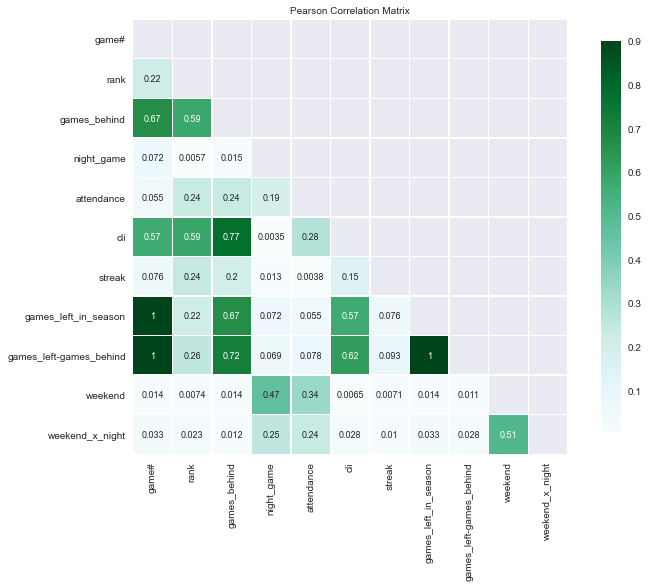

In [34]:
# check the correlation matrix between features to check for muliti-colinearity
mask = np.zeros_like(nym_home.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(nym_home.corr().abs(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

* game# is extremely correlated with games_left_in_season and games_left-games_behind
* games_left_in_season and games_left-games_behind are highly correlated.

### Exploratory Data Analysis

In [35]:
nym_home.head()

,game#,date,opponent,rank,games_behind,night_game,attendance,cli,streak,games_left_in_season,day_of_week,month,games_left-games_behind,weekend,weekend_x_night
0,1,Monday Apr 5 2010,FLA,1,-0.00,0,41245.00,1.08,1,161,Monday,Apr,161.00,0,0
1,2,Wednesday Apr 7 2010,FLA,3,-1.00,1,38863.00,1.14,-1,160,Wednesday,Apr,159.00,0,0
2,3,Thursday Apr 8 2010,FLA,4,-1.00,1,25982.00,1.01,-2,159,Thursday,Apr,158.00,0,0
3,4,Friday Apr 9 2010,WSN,2,-1.00,1,28055.00,0.98,1,158,Friday,Apr,157.00,0,0
4,5,Saturday Apr 10 2010,WSN,4,-2.00,0,33044.00,1.06,-1,157,Saturday,Apr,155.00,1,0


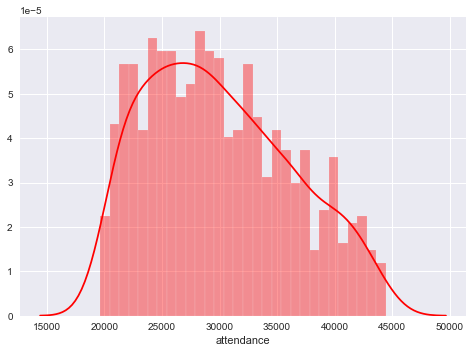

In [48]:
# create a distribution plot for attendance
sns.distplot(nym_home['attendance'], bins=30, color= 'red')
plt.show()

* The data is slightly left-skewed.

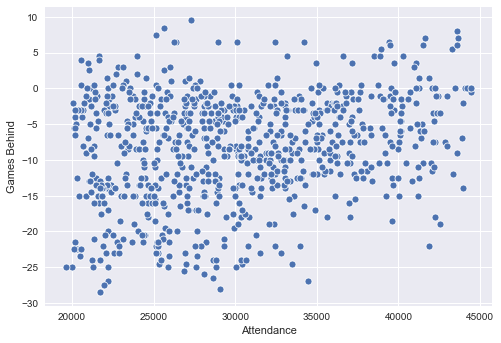

In [37]:
# create a scatterplot between attendance and games_behind
sns.scatterplot(x = 'attendance' , y = 'games_behind', data= nym_home, )
plt.xlabel('Attendance')
plt.ylabel('Games Behind')
plt.savefig('Visualizations/attendance_x_games_behind.png')

* There seems to be no significant correlation between the variables.

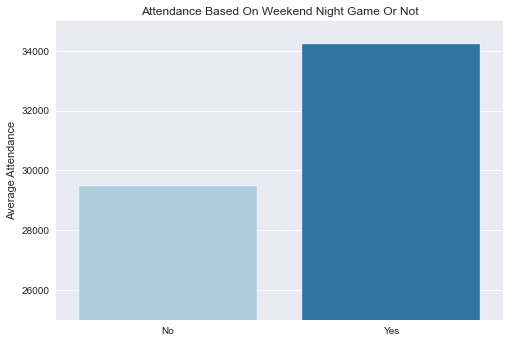

In [48]:
# check the average crowd for games played during the night on the weekends and alternative options
grp_night_wknd = nym_home.groupby('weekend_x_night')['attendance'].mean().sort_values()
sns.barplot(y = grp_night_wknd, x = ['No', 'Yes'], palette= 'Paired')

plt.ylim(25000,35000)
plt.ylabel('Average Attendance')
plt.title('attendance based on weekend night game or not'.title())
plt.savefig('Visualizations/weekend_night_games.png')

* Weekned-night games definitely more popular than alternative options.

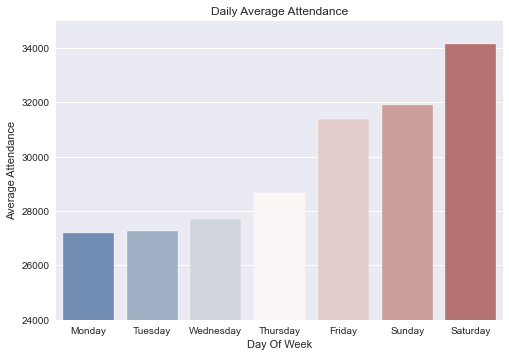

In [55]:
# check which days of the week draw more crowds
grpby_day = nym_home.groupby('day_of_week')['attendance'].mean().sort_values()
sns.barplot(y= grpby_day, x = grpby_day.index, palette= 'vlag')
plt.ylim(24000, 35000)
plt.xlabel('Day Of Week')
plt.ylabel('Average Attendance')
plt.title('daily average attendance'.title())
plt.savefig('Visualizations/avg_attendance_daily.png')

* Expectedly Friday-Sunday draws in more crowd than other days.

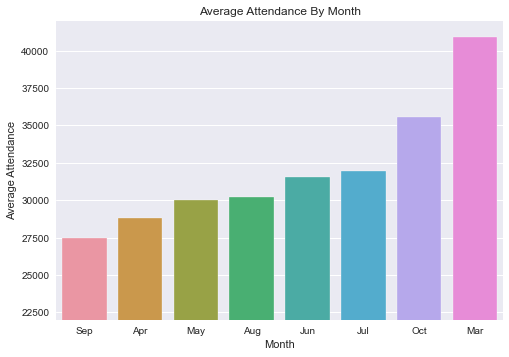

In [54]:
# check avg attendance by month
grpby_month = nym_home.groupby('month')['attendance'].mean().sort_values()
sns.barplot(y= grpby_month, x = grpby_month.index,)
plt.ylim(22000, 42000)
plt.xlabel('Month')
plt.ylabel('Average Attendance')
plt.title('average attendance by month'.title())
plt.savefig('Visualizations/avg_attendance_month.png')

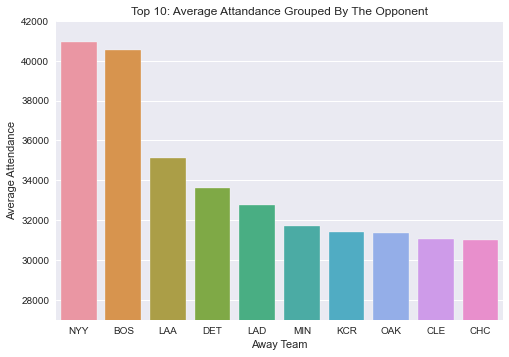

In [98]:
# check avg attendance grouped by the away team

away_team_grpby = nym_home.groupby('opponent')['attendance'].mean().sort_values(ascending = False).head(10)
sns.barplot(y= away_team_grpby, x = away_team_grpby.index, )
plt.ylim(27000, 42000)
plt.xlabel('Away Team')
plt.ylabel('Average Attendance')
plt.title('top 10: average attandance grouped by the opponent'.title())
plt.savefig('Visualizations/avg_attendance_by_team.png')

* Some opponenents are clearly more popular than others such the New York Yankees and the Boston Red Sox.

In [42]:
# create dummy variables
nym_dummy = pd.get_dummies(nym_home, columns= ['month','day_of_week','opponent'], 
               prefix = {'month': '', 'day_of_week': '', 'opponent': ''}, prefix_sep = '' )

In [43]:
# drop unnecessarry or highly multi-colinear features
nym_dummy.drop(columns=['date', 'Saturday', 'Sunday', 'game#', 'games_left_in_season'], inplace= True)

In [44]:
# standardize the dataframe except for the target variable
nym_normal = (nym_dummy - nym_dummy.mean())/(nym_dummy.std())

In [45]:
nym_normal['attendance'] = nym_dummy['attendance']  # plug back in non-normalized target

In [46]:
print(nym_normal.shape)
nym_normal.head()

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


In [47]:
# check correlation between features and target
corr = nym_normal.corr().abs()['attendance']
corr[corr > 0.05].sort_values(ascending = False)

attendance                1.00
weekend                   0.34
NYY                       0.31
cli                       0.28
weekend_x_night           0.24
rank                      0.24
games_behind              0.24
Sep                       0.19
night_game                0.19
Tuesday                   0.18
Wednesday                 0.15
Monday                    0.15
MIA                       0.14
Jul                       0.13
Mar                       0.11
BOS                       0.10
Jun                       0.10
Friday                    0.09
LAD                       0.09
Apr                       0.08
Thursday                  0.08
CIN                       0.08
games_left-games_behind   0.08
Oct                       0.08
ATL                       0.07
LAA                       0.07
DET                       0.06
Name: attendance, dtype: float64

In [48]:
from statsmodels.formula.api import ols

lr_model = ols(formula='attendance~weekend+NYY+cli+rank+MIA+Friday+BOS', 
               data=nym_normal).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     62.86
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           4.95e-72
Time:                        10:42:37   Log-Likelihood:                -8051.8
No. Observations:                 810   AIC:                         1.612e+04
Df Residuals:                     802   BIC:                         1.616e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       3e+04    177.321    169.163      0.000    2.96e+04    3.03e+04
weekend     2391.3464    186.115     12.849      0.000    2026.016    2756.677
NYY         1892.2614    178.107     10.624      0.000    1542.651    2241.872
cli         1299.4826    221.301      5.872      0.000     865.085    1733.880
rank        -768.1428    222.712     -3.449      0.001   -1205.310    -330.975
MIA         -775.6190    178.130     -4.354      0.000   -1125.274    -425.964
Friday      1209.3272    186.015      6.501      0.000     844.194    1574.460
BOS          397.3612    179.456      2.214      0.027      45.103     749.619
==============================================================================
Omnibus:                       21.108   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.384
Skew:                           0.404   Prob(JB):                     1.38e-05
Kurtosis:                       2.892   Cond. No.                         2.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# save the split datasets into seprate csv files
nym_normal.to_csv('cleaned_mlb.csv', index = False)